# AutoGluon Zeroshot

This notebook shows a quick analysis of offline evaluations generated from LightGBM, CatBoost, XGBoost, FastAI, and Torch models for 601 configs on 78 datasets.

We illustrate some potential benefits of learning zero-shot configurations compared to the current default used in AutoGluon.

## Data analysis, context


**Files**
* task_metadata.csv: full metadata info for each dataset
* results_ranked_by_dataset_valid.csv: loss obtained on each config dataset
* results_ranked_valid.csv: aggregated loss obtained on each config
* openml_ag_*.csv: loss obtained on each config dataset with additional information such as validation scores

In [6]:
import pandas as pd
from autogluon.common.loaders import load_pd

path_prefix = '../data/results/all_v3'
path_prefix_automl = '../data/results/automl'

df_results = pd.read_csv(f"{path_prefix}/results_ranked_valid.csv")
df_results_by_dataset = pd.read_csv(f"{path_prefix}/results_ranked_by_dataset_valid.parquet")
df_metadata = pd.read_csv(f"../data/metadata/task_metadata.csv")
df_raw = load_pd.load(f"{path_prefix}/openml_ag_2022_10_13_zs_models.parquet")

df_raw['tid_new'] = df_raw['tid'].astype(int).astype(str) + '_' + df_raw['fold'].astype(str)

In [7]:
from autogluon.common.loaders import load_json
configs_prefix = '../data/configs/configs_20221004'
configs_catboost = load_json.load(path=f'{configs_prefix}/configs_catboost.json')
configs_fastai = load_json.load(path=f'{configs_prefix}/configs_fastai.json')
configs_lightgbm = load_json.load(path=f'{configs_prefix}/configs_lightgbm.json')
configs_nn_torch = load_json.load(path=f'{configs_prefix}/configs_nn_torch.json')
configs_xgboost = load_json.load(path=f'{configs_prefix}/configs_xgboost.json')
configs_prefix_2 = '../data/configs'
configs_rf = load_json.load(path=f'{configs_prefix_2}/configs_rf.json')
configs_xt = load_json.load(path=f'{configs_prefix_2}/configs_xt.json')
configs_knn = load_json.load(path=f'{configs_prefix_2}/configs_knn.json')
configs_full = {}
configs_full.update(configs_catboost)
configs_full.update(configs_fastai)
configs_full.update(configs_lightgbm)
configs_full.update(configs_nn_torch)
configs_full.update(configs_xgboost)
configs_full.update(configs_rf)
configs_full.update(configs_xt)
configs_full.update(configs_knn)

In [8]:
def combine_results_with_score_val(df_raw, df_results_by_dataset):
    df_raw_zoom = df_raw[['model', 'tid_new', 'score_val', 'fold', 'tid']].copy()
    df_raw_zoom['dataset'] = df_raw_zoom['tid_new']
    df_raw_zoom['framework'] = df_raw_zoom['model']
    df_raw_zoom = df_raw_zoom[['framework', 'dataset', 'score_val', 'fold', 'tid']]
    df_results_by_dataset_with_score_val = df_results_by_dataset.merge(df_raw_zoom, on=['framework', 'dataset'])
    return df_results_by_dataset_with_score_val

In [9]:
df_results_by_dataset_with_score_val = combine_results_with_score_val(df_raw, df_results_by_dataset)

In [10]:
# Load in real framework results to score against
df_results_by_dataset_automl = load_pd.load(f'{path_prefix_automl}/results_ranked_by_dataset_valid.csv')
df_results_by_dataset_automl


,dataset,framework,problem_type,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank
0,10090_0,AutoGluon_mq_1h8c_2022_06_26_binary,multiclass,3477.000000,0.94512,0.014667,0.156614,0.229152,5.570063,5.500000,4.0
1,10090_0,AutoGluon_mq_4h64c_2022_06_21_autogluon_single,multiclass,624.229905,0.79710,0.004489,0.000000,0.000000,1.000000,1.683313,1.0
2,10090_0,H2OAutoML_1h8c_gp3_2022_jmlr,multiclass,3663.400000,1.06749,0.024000,0.253296,0.418600,5.868671,9.000000,5.0
3,10090_0,TunedRandomForest_1h8c_gp3_2022_jmlr,multiclass,3614.900000,1.44304,0.002667,0.447625,1.000000,5.790975,1.000000,7.0
4,10090_0,autosklearn_1h8c_gp3_2022_jmlr,multiclass,3669.200000,0.87461,0.016667,0.088620,0.119992,5.877963,6.250000,2.0
...,...,...,...,...,...,...,...,...,...,...,...
6750,7593_9,H2OAutoML_1h8c_gp3_2022_jmlr,multiclass,3780.200000,0.11074,0.000112,0.486999,0.615977,8.156101,6.500000,6.0
6751,7593_9,TunedRandomForest_1h8c_gp3_2022_jmlr,multiclass,3631.300000,0.10032,0.000017,0.433716,0.496966,7.834837,1.000000,5.0
6752,7593_9,autosklearn_1h8c_gp3_2022_jmlr,multiclass,3727.800000,0.14437,0.000373,0.606477,1.000000,8.043044,21.700000,7.0
6753,7593_9,flaml_1h8c_gp3_2022_jmlr,multiclass,4002.300000,0.06710,0.000523,0.153394,0.117567,8.635301,30.400000,2.0


In [11]:
df_results_by_dataset_with_score_val

,dataset,framework,problem_type,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank,score_val,fold,tid
0,146818_0,CatBoost_c1,binary,0.608295,0.05093,0.000061,0.383333,0.244681,4.952145,1.165115,239.5,0.925983,0,146818.0
1,146818_0,CatBoost_r1,binary,0.781058,0.05178,0.000054,0.393443,0.255319,6.358608,1.044421,268.5,0.927795,0,146818.0
2,146818_0,CatBoost_r10,binary,3.473934,0.05178,0.000075,0.393443,0.255319,28.281381,1.433768,268.5,0.922101,0,146818.0
3,146818_0,CatBoost_r100,binary,0.866181,0.05348,0.000053,0.412698,0.276596,7.051597,1.026799,315.0,0.926242,0,146818.0
4,146818_0,CatBoost_r11,binary,0.476744,0.04924,0.000054,0.362069,0.223404,3.881182,1.035045,171.0,0.921584,0,146818.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46811,3945_0,RandomForest_r50,binary,27.081736,0.19338,0.000025,0.301543,0.205155,28.526362,5.609973,293.5,0.794131,0,3945.0
46812,3945_0,RandomForest_r6,binary,5.049138,0.23471,0.000027,0.424543,0.350575,5.318475,6.200791,502.5,0.768517,0,3945.0
46813,3945_0,RandomForest_r7,binary,35.597520,0.23508,0.000026,0.425453,0.351883,37.496405,5.867653,504.5,0.794256,0,3945.0
46814,3945_0,RandomForest_r8,binary,4.750399,0.20680,0.000026,0.346871,0.252373,5.003801,5.928844,382.5,0.768253,0,3945.0


In [12]:
unique_dataset_folds = set(list(df_results_by_dataset_with_score_val['dataset'].unique()))
df_results_by_dataset_automl = df_results_by_dataset_automl[df_results_by_dataset_automl['dataset'].isin(unique_dataset_folds)]
df_results_by_dataset_automl

,dataset,framework,problem_type,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank
70,146818_0,AutoGluon_mq_1h8c_2022_06_26_binary,binary,14.200000,0.05263,0.001449,0.000008,0.000023,27.319079,100.000000,2.0
71,146818_0,AutoGluon_mq_4h64c_2022_06_21_autogluon_single,binary,0.519783,0.05263,0.001629,0.000000,0.000000,1.000000,112.434387,2.0
72,146818_0,H2OAutoML_1h8c_gp3_2022_jmlr,binary,3531.700000,0.07131,0.004348,0.261902,1.000000,6794.562816,300.000000,7.0
73,146818_0,TunedRandomForest_1h8c_gp3_2022_jmlr,binary,2535.900000,0.05560,0.004348,0.053440,0.159109,4878.764290,300.000000,5.0
74,146818_0,autosklearn_1h8c_gp3_2022_jmlr,binary,3644.600000,0.05857,0.001449,0.101452,0.318195,7011.768734,100.000000,6.0
...,...,...,...,...,...,...,...,...,...,...,...
6589,360945_0,H2OAutoML_1h8c_gp3_2022_jmlr,regression,3531.600000,17087.30000,0.001835,0.944100,0.840761,2877.869982,200.000000,3.0
6590,360945_0,TunedRandomForest_1h8c_gp3_2022_jmlr,regression,341.100000,20142.70000,0.002752,0.952580,1.000000,277.959410,300.000000,7.0
6591,360945_0,autosklearn_1h8c_gp3_2022_jmlr,regression,3650.500000,19938.70000,0.001835,0.952094,0.989368,2974.760554,200.000000,6.0
6592,360945_0,flaml_1h8c_gp3_2022_jmlr,regression,3604.800000,19748.90000,0.000009,0.951634,0.979476,2937.520023,1.000000,5.0


In [13]:
unique_dataset_folds = set(list(df_results_by_dataset_automl['dataset'].unique()))
df_results_by_dataset_with_score_val = df_results_by_dataset_with_score_val[df_results_by_dataset_with_score_val['dataset'].isin(unique_dataset_folds)]
df_results_by_dataset = df_results_by_dataset[df_results_by_dataset['dataset'].isin(unique_dataset_folds)]
df_results_by_dataset_with_score_val

,dataset,framework,problem_type,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank,score_val,fold,tid
0,146818_0,CatBoost_c1,binary,0.608295,0.05093,0.000061,0.383333,0.244681,4.952145,1.165115,239.5,0.925983,0,146818.0
1,146818_0,CatBoost_r1,binary,0.781058,0.05178,0.000054,0.393443,0.255319,6.358608,1.044421,268.5,0.927795,0,146818.0
2,146818_0,CatBoost_r10,binary,3.473934,0.05178,0.000075,0.393443,0.255319,28.281381,1.433768,268.5,0.922101,0,146818.0
3,146818_0,CatBoost_r100,binary,0.866181,0.05348,0.000053,0.412698,0.276596,7.051597,1.026799,315.0,0.926242,0,146818.0
4,146818_0,CatBoost_r11,binary,0.476744,0.04924,0.000054,0.362069,0.223404,3.881182,1.035045,171.0,0.921584,0,146818.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46203,360945_0,RandomForest_r50,regression,0.486159,23177.62335,0.000983,0.296529,0.439243,1.818241,23.162630,374.5,-24165.244137,0,360945.0
46204,360945_0,RandomForest_r6,regression,0.385493,28691.63417,0.001084,0.431723,0.791643,1.441749,25.541121,586.0,-25822.696304,0,360945.0
46205,360945_0,RandomForest_r7,regression,0.687195,21479.64569,0.001001,0.240919,0.330725,2.570118,23.572709,333.5,-23630.588648,0,360945.0
46206,360945_0,RandomForest_r8,regression,0.385589,25771.63217,0.000995,0.367336,0.605026,1.442107,23.434041,494.5,-23881.818548,0,360945.0


In [14]:
df_raw

,constraint,dataset,fold,framework,framework_parent,metric,metric_error,metric_score,model,problem_type,score_val,tid,time_infer_s,time_train_s,tid_new
0,16h8c,abalone,0,AutoGluon_zs_CAT_16h8c_2022_10_13_zs_CatBoost_r74,AutoGluon_zs_CAT_16h8c,neg_rmse,2.176534,-2.176534,CatBoost_r74,regression,-2.061421,359944.0,0.003132,2.580789,359944_0
1,16h8c,abalone,0,AutoGluon_zs_CAT_16h8c_2022_10_13_zs_CatBoost_r24,AutoGluon_zs_CAT_16h8c,neg_rmse,2.183263,-2.183263,CatBoost_r24,regression,-2.065892,359944.0,0.005140,7.329038,359944_0
2,16h8c,abalone,0,AutoGluon_zs_CAT_16h8c_2022_10_13_zs_CatBoost_r76,AutoGluon_zs_CAT_16h8c,neg_rmse,2.184167,-2.184167,CatBoost_r76,regression,-2.060895,359944.0,0.004778,6.534689,359944_0
3,16h8c,abalone,0,AutoGluon_zs_CAT_16h8c_2022_10_13_zs_CatBoost_r53,AutoGluon_zs_CAT_16h8c,neg_rmse,2.185593,-2.185593,CatBoost_r53,regression,-2.063693,359944.0,0.002629,3.602148,359944_0
4,16h8c,abalone,0,AutoGluon_zs_CAT_16h8c_2022_10_13_zs_CatBoost_r50,AutoGluon_zs_CAT_16h8c,neg_rmse,2.186743,-2.186743,CatBoost_r50,regression,-2.066515,359944.0,0.003792,1.447448,359944_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640891,16h8c,yprop_4_1,9,AutoGluon_zs_XT_16h8c_2022_10_13_zs_ExtraTrees...,AutoGluon_zs_XT_16h8c,neg_rmse,0.028347,-0.028347,ExtraTrees_r48,regression,-0.042630,359940.0,0.108469,0.419669,359940_9
640892,16h8c,yprop_4_1,9,AutoGluon_zs_XT_16h8c_2022_10_13_zs_ExtraTrees...,AutoGluon_zs_XT_16h8c,neg_rmse,0.028473,-0.028473,ExtraTrees_r11,regression,-0.042780,359940.0,0.108992,0.420014,359940_9
640893,16h8c,yprop_4_1,9,AutoGluon_zs_XT_16h8c_2022_10_13_zs_ExtraTrees...,AutoGluon_zs_XT_16h8c,neg_rmse,0.028544,-0.028544,ExtraTrees_r44,regression,-0.042857,359940.0,0.107933,0.421809,359940_9
640894,16h8c,yprop_4_1,9,AutoGluon_zs_XT_16h8c_2022_10_13_zs_ExtraTrees_r1,AutoGluon_zs_XT_16h8c,neg_rmse,0.028544,-0.028544,ExtraTrees_r1,regression,-0.042857,359940.0,0.114001,0.422735,359940_9


In [15]:
df_raw = df_raw[df_raw['tid_new'].isin(unique_dataset_folds)]
df_raw

,constraint,dataset,fold,framework,framework_parent,metric,metric_error,metric_score,model,problem_type,score_val,tid,time_infer_s,time_train_s,tid_new
0,16h8c,abalone,0,AutoGluon_zs_CAT_16h8c_2022_10_13_zs_CatBoost_r74,AutoGluon_zs_CAT_16h8c,neg_rmse,2.176534,-2.176534,CatBoost_r74,regression,-2.061421,359944.0,0.003132,2.580789,359944_0
1,16h8c,abalone,0,AutoGluon_zs_CAT_16h8c_2022_10_13_zs_CatBoost_r24,AutoGluon_zs_CAT_16h8c,neg_rmse,2.183263,-2.183263,CatBoost_r24,regression,-2.065892,359944.0,0.005140,7.329038,359944_0
2,16h8c,abalone,0,AutoGluon_zs_CAT_16h8c_2022_10_13_zs_CatBoost_r76,AutoGluon_zs_CAT_16h8c,neg_rmse,2.184167,-2.184167,CatBoost_r76,regression,-2.060895,359944.0,0.004778,6.534689,359944_0
3,16h8c,abalone,0,AutoGluon_zs_CAT_16h8c_2022_10_13_zs_CatBoost_r53,AutoGluon_zs_CAT_16h8c,neg_rmse,2.185593,-2.185593,CatBoost_r53,regression,-2.063693,359944.0,0.002629,3.602148,359944_0
4,16h8c,abalone,0,AutoGluon_zs_CAT_16h8c_2022_10_13_zs_CatBoost_r50,AutoGluon_zs_CAT_16h8c,neg_rmse,2.186743,-2.186743,CatBoost_r50,regression,-2.066515,359944.0,0.003792,1.447448,359944_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640423,16h8c,yprop_4_1,0,AutoGluon_zs_XT_16h8c_2022_10_13_zs_ExtraTrees...,AutoGluon_zs_XT_16h8c,neg_rmse,0.026210,-0.026210,ExtraTrees_r26,regression,-0.027603,359940.0,0.110112,0.420497,359940_0
640424,16h8c,yprop_4_1,0,AutoGluon_zs_XT_16h8c_2022_10_13_zs_ExtraTrees...,AutoGluon_zs_XT_16h8c,neg_rmse,0.026370,-0.026370,ExtraTrees_r11,regression,-0.027767,359940.0,0.109114,0.420857,359940_0
640425,16h8c,yprop_4_1,0,AutoGluon_zs_XT_16h8c_2022_10_13_zs_ExtraTrees...,AutoGluon_zs_XT_16h8c,neg_rmse,0.026464,-0.026464,ExtraTrees_r44,regression,-0.027868,359940.0,0.108518,0.421876,359940_0
640426,16h8c,yprop_4_1,0,AutoGluon_zs_XT_16h8c_2022_10_13_zs_ExtraTrees_r1,AutoGluon_zs_XT_16h8c,neg_rmse,0.026464,-0.026464,ExtraTrees_r1,regression,-0.027868,359940.0,0.108849,0.426150,359940_0


In [16]:
df_results_by_dataset_automl

,dataset,framework,problem_type,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank
70,146818_0,AutoGluon_mq_1h8c_2022_06_26_binary,binary,14.200000,0.05263,0.001449,0.000008,0.000023,27.319079,100.000000,2.0
71,146818_0,AutoGluon_mq_4h64c_2022_06_21_autogluon_single,binary,0.519783,0.05263,0.001629,0.000000,0.000000,1.000000,112.434387,2.0
72,146818_0,H2OAutoML_1h8c_gp3_2022_jmlr,binary,3531.700000,0.07131,0.004348,0.261902,1.000000,6794.562816,300.000000,7.0
73,146818_0,TunedRandomForest_1h8c_gp3_2022_jmlr,binary,2535.900000,0.05560,0.004348,0.053440,0.159109,4878.764290,300.000000,5.0
74,146818_0,autosklearn_1h8c_gp3_2022_jmlr,binary,3644.600000,0.05857,0.001449,0.101452,0.318195,7011.768734,100.000000,6.0
...,...,...,...,...,...,...,...,...,...,...,...
6589,360945_0,H2OAutoML_1h8c_gp3_2022_jmlr,regression,3531.600000,17087.30000,0.001835,0.944100,0.840761,2877.869982,200.000000,3.0
6590,360945_0,TunedRandomForest_1h8c_gp3_2022_jmlr,regression,341.100000,20142.70000,0.002752,0.952580,1.000000,277.959410,300.000000,7.0
6591,360945_0,autosklearn_1h8c_gp3_2022_jmlr,regression,3650.500000,19938.70000,0.001835,0.952094,0.989368,2974.760554,200.000000,6.0
6592,360945_0,flaml_1h8c_gp3_2022_jmlr,regression,3604.800000,19748.90000,0.000009,0.951634,0.979476,2937.520023,1.000000,5.0


In [17]:
df_results_by_dataset_automl_minimal = df_results_by_dataset_automl[['dataset', 'framework', 'metric_error']]
df_results_by_dataset_automl_minimal

,dataset,framework,metric_error
70,146818_0,AutoGluon_mq_1h8c_2022_06_26_binary,0.05263
71,146818_0,AutoGluon_mq_4h64c_2022_06_21_autogluon_single,0.05263
72,146818_0,H2OAutoML_1h8c_gp3_2022_jmlr,0.07131
73,146818_0,TunedRandomForest_1h8c_gp3_2022_jmlr,0.05560
74,146818_0,autosklearn_1h8c_gp3_2022_jmlr,0.05857
...,...,...,...
6589,360945_0,H2OAutoML_1h8c_gp3_2022_jmlr,17087.30000
6590,360945_0,TunedRandomForest_1h8c_gp3_2022_jmlr,20142.70000
6591,360945_0,autosklearn_1h8c_gp3_2022_jmlr,19938.70000
6592,360945_0,flaml_1h8c_gp3_2022_jmlr,19748.90000


In [18]:
df_results_by_dataset_with_score_val

,dataset,framework,problem_type,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank,score_val,fold,tid
0,146818_0,CatBoost_c1,binary,0.608295,0.05093,0.000061,0.383333,0.244681,4.952145,1.165115,239.5,0.925983,0,146818.0
1,146818_0,CatBoost_r1,binary,0.781058,0.05178,0.000054,0.393443,0.255319,6.358608,1.044421,268.5,0.927795,0,146818.0
2,146818_0,CatBoost_r10,binary,3.473934,0.05178,0.000075,0.393443,0.255319,28.281381,1.433768,268.5,0.922101,0,146818.0
3,146818_0,CatBoost_r100,binary,0.866181,0.05348,0.000053,0.412698,0.276596,7.051597,1.026799,315.0,0.926242,0,146818.0
4,146818_0,CatBoost_r11,binary,0.476744,0.04924,0.000054,0.362069,0.223404,3.881182,1.035045,171.0,0.921584,0,146818.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46203,360945_0,RandomForest_r50,regression,0.486159,23177.62335,0.000983,0.296529,0.439243,1.818241,23.162630,374.5,-24165.244137,0,360945.0
46204,360945_0,RandomForest_r6,regression,0.385493,28691.63417,0.001084,0.431723,0.791643,1.441749,25.541121,586.0,-25822.696304,0,360945.0
46205,360945_0,RandomForest_r7,regression,0.687195,21479.64569,0.001001,0.240919,0.330725,2.570118,23.572709,333.5,-23630.588648,0,360945.0
46206,360945_0,RandomForest_r8,regression,0.385589,25771.63217,0.000995,0.367336,0.605026,1.442107,23.434041,494.5,-23881.818548,0,360945.0


In [19]:
df_results_by_dataset_with_score_val_minimal = df_results_by_dataset_with_score_val[['dataset', 'framework', 'metric_error', 'score_val']]
df_results_by_dataset_with_score_val_minimal

,dataset,framework,metric_error,score_val
0,146818_0,CatBoost_c1,0.05093,0.925983
1,146818_0,CatBoost_r1,0.05178,0.927795
2,146818_0,CatBoost_r10,0.05178,0.922101
3,146818_0,CatBoost_r100,0.05348,0.926242
4,146818_0,CatBoost_r11,0.04924,0.921584
...,...,...,...,...
46203,360945_0,RandomForest_r50,23177.62335,-24165.244137
46204,360945_0,RandomForest_r6,28691.63417,-25822.696304
46205,360945_0,RandomForest_r7,21479.64569,-23630.588648
46206,360945_0,RandomForest_r8,25771.63217,-23881.818548


In [20]:
def get_rank(error, error_lst):
    rank = 1
    for e in error_lst:
        if error > e:
            rank += 1
    return rank

unique_dataset_folds_list = list(unique_dataset_folds)
df_results_by_dataset_vs_automl = []
for i, d in enumerate(unique_dataset_folds_list):
    print(i)
    a = df_results_by_dataset[df_results_by_dataset['dataset'] == d].copy()
    b = df_results_by_dataset_automl_minimal[df_results_by_dataset_automl_minimal['dataset'] == d]
    c = list(b['metric_error'])
    c.sort()
    print(c)
    a['rank'] = [get_rank(d[0], c) for d in zip(a['metric_error'])]
    df_results_by_dataset_vs_automl.append(a)
    print(a)
df_results_by_dataset_vs_automl = pd.concat(df_results_by_dataset_vs_automl)
df_results_by_dataset_vs_automl

0
[0.0881, 0.11185, 0.13008, 0.13926, 0.14654, 0.1478, 0.15326]
       dataset         framework problem_type  time_train_s  metric_error  \
7904  190410_0       CatBoost_c1       binary     17.704499       0.14382   
7905  190410_0       CatBoost_r1       binary     26.366632       0.15081   
7906  190410_0      CatBoost_r10       binary    286.827051       0.14544   
7907  190410_0     CatBoost_r100       binary     30.160805       0.15232   
7908  190410_0      CatBoost_r11       binary     18.604934       0.14877   
...        ...               ...          ...           ...           ...   
8507  190410_0  RandomForest_r50       binary     14.281122       0.15938   
8508  190410_0   RandomForest_r6       binary      2.764154       0.16435   
8509  190410_0   RandomForest_r7       binary     23.395022       0.15866   
8510  190410_0   RandomForest_r8       binary      2.363320       0.16360   
8511  190410_0   RandomForest_r9       binary      1.461760       0.16888   

      time_

,dataset,framework,problem_type,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank
7904,190410_0,CatBoost_c1,binary,17.704499,0.14382,0.000022,0.062464,0.058978,31.537826,3.041796,5
7905,190410_0,CatBoost_r1,binary,26.366632,0.15081,0.000010,0.105918,0.104866,46.968075,1.408282,7
7906,190410_0,CatBoost_r10,binary,286.827051,0.14544,0.000021,0.072897,0.069603,510.938021,2.898994,5
7907,190410_0,CatBoost_r100,binary,30.160805,0.15232,0.000010,0.114730,0.114721,53.726808,1.309376,7
7908,190410_0,CatBoost_r11,binary,18.604934,0.14877,0.000009,0.093654,0.091469,33.141811,1.236068,7
...,...,...,...,...,...,...,...,...,...,...,...
30395,359960_0,RandomForest_r50,multiclass,0.777874,0.23543,0.000627,0.990058,0.157163,2.826112,12.126825,8
30396,359960_0,RandomForest_r6,multiclass,0.575904,0.11757,0.000649,0.980090,0.077691,2.092330,12.548330,8
30397,359960_0,RandomForest_r7,multiclass,0.575179,0.11543,0.000634,0.979722,0.076253,2.089696,12.265423,8
30398,359960_0,RandomForest_r8,multiclass,0.678824,0.18183,0.000634,0.987126,0.121019,2.466251,12.269587,8


In [21]:
import numpy as np
unique_datasets = np.array(list(df_results_by_dataset_with_score_val['tid'].unique()))
len(unique_datasets)

75

In [272]:
df_results.head()

,framework,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank,rank=1_count,rank=2_count,rank=3_count,rank>3_count,error_count
0,RandomForest_r28,92.296417,73890.893958,0.000526,0.081454,0.166738,12.833223,1.898232,15.686058,91,25,36,845,0
1,RandomForest_r37,83.997290,73295.025262,0.000517,0.097231,0.165116,11.986636,1.338466,15.690572,8,67,44,878,1
2,RandomForest_r7,90.436059,73295.316760,0.000522,0.093835,0.159316,12.126697,1.829982,15.781846,5,49,39,904,0
3,RandomForest_r16,93.257857,72910.603851,0.000531,0.103255,0.155958,11.788341,2.594802,16.149950,5,42,33,917,0
4,RandomForest_r40,82.104611,72910.378871,0.000514,0.106909,0.168060,11.456245,1.302864,16.443831,9,32,33,923,10


In [273]:
df_results.describe()

,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank,rank=1_count,rank=2_count,rank=3_count,rank>3_count,error_count
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,41.259768,74220.523104,0.000523,0.180091,0.322189,4.433029,1.871027,26.000000,7.294118,26.588235,19.941176,943.176471,2.705882
std,30.004985,2833.222395,0.000016,0.076649,0.188971,4.503039,0.653261,8.700232,16.794397,46.885467,19.632027,70.870221,4.323397
min,17.152897,70771.199749,0.000502,0.078912,0.155958,1.023307,1.095438,15.686058,0.000000,0.000000,1.000000,687.000000,0.000000
25%,20.164555,72148.143555,0.000509,0.125365,0.207565,1.355776,1.289357,18.990471,0.000000,5.000000,10.000000,945.000000,0.000000
50%,22.351497,73380.625681,0.000520,0.162874,0.254964,1.649764,1.815662,23.520562,2.000000,10.000000,15.000000,973.000000,0.000000
75%,72.400317,74851.513132,0.000531,0.203776,0.293818,7.844763,2.344818,28.902708,6.000000,25.500000,18.000000,978.000000,5.500000
max,102.050003,82724.770084,0.000559,0.346912,0.857654,14.059766,3.528839,45.246740,91.000000,205.000000,96.000000,987.000000,10.000000


In [274]:
df_results_by_dataset.head()

,dataset,framework,problem_type,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank
0,10090_0,RandomForest_c1,multiclass,6.698463,2.19804,0.001333,0.279740,0.298287,1.146173,1.885705,12.5
1,10090_0,RandomForest_r1,multiclass,5.874031,3.64453,0.000765,0.565606,1.000000,1.005104,1.081641,50.5
2,10090_0,RandomForest_r10,multiclass,14.060798,2.31109,0.000775,0.314971,0.353128,2.405941,1.096550,18.5
3,10090_0,RandomForest_r11,multiclass,9.802397,3.52356,0.000787,0.550692,0.941313,1.677287,1.112859,49.0
4,10090_0,RandomForest_r12,multiclass,10.574346,2.70065,0.000783,0.413785,0.542111,1.809375,1.106699,24.5


In [275]:
df_results_by_dataset.describe()

,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank
count,50847.000000,5.084700e+04,50847.000000,50847.000000,50847.000000,50847.000000,50847.000000,50847.000000
mean,41.259768,7.422052e+04,0.000523,0.180091,0.322189,4.433029,1.871027,26.000000
std,151.244578,7.127502e+05,0.001270,0.231978,0.290108,16.607960,2.975937,14.681199
min,0.262346,0.000000e+00,0.000005,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.574275,1.098100e-01,0.000051,0.020076,0.087353,1.211411,1.060397,13.500000
50%,1.237907,3.543000e-01,0.000206,0.081116,0.231631,1.402735,1.089715,26.000000
75%,7.415798,1.321125e+00,0.000513,0.240453,0.490826,1.886725,1.291520,38.500000
max,2589.437601,8.540095e+06,0.011958,1.000000,1.000000,238.668126,63.648363,51.000000


In [276]:
df_metadata.head()

,tid,ttid,did,name,task_type,status,estimation_procedure,evaluation_measures,source_data,target_feature,...,NumberOfNumericFeatures,NumberOfSymbolicFeatures,number_samples,cost_matrix,source_data_labeled,target_feature_event,target_feature_left,target_feature_right,quality_measure,target_value
0,2073,TaskType.SUPERVISED_CLASSIFICATION,181,yeast,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,181,class_protein_localization,...,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3945,TaskType.SUPERVISED_CLASSIFICATION,1111,KDDCup09_appetency,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,1111,APPETENCY,...,192.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7593,TaskType.SUPERVISED_CLASSIFICATION,1596,covertype,Supervised Classification,active,10-fold Crossvalidation,NaN,1596,class,...,10.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10090,TaskType.SUPERVISED_CLASSIFICATION,1457,amazon-commerce-reviews,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,1457,Class,...,10000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,146818,TaskType.SUPERVISED_CLASSIFICATION,40981,Australian,Supervised Classification,active,10-fold Crossvalidation,NaN,40981,A15,...,6.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
df_results_by_dataset['dataset'].value_counts()

10090_0     51
359967_1    51
359965_8    51
359965_9    51
359966_0    51
            ..
359932_8    51
359932_9    51
359933_0    51
359933_1    51
7593_9      51
Name: dataset, Length: 997, dtype: int64

In [278]:
df_results_by_dataset['framework'].value_counts()

RandomForest_c1     997
RandomForest_r43    997
RandomForest_r34    997
RandomForest_r35    997
RandomForest_r36    997
RandomForest_r37    997
RandomForest_r38    997
RandomForest_r39    997
RandomForest_r4     997
RandomForest_r40    997
RandomForest_r41    997
RandomForest_r42    997
RandomForest_r44    997
RandomForest_r32    997
RandomForest_r45    997
RandomForest_r46    997
RandomForest_r47    997
RandomForest_r48    997
RandomForest_r49    997
RandomForest_r5     997
RandomForest_r50    997
RandomForest_r6     997
RandomForest_r7     997
RandomForest_r8     997
RandomForest_r33    997
RandomForest_r31    997
RandomForest_r1     997
RandomForest_r2     997
RandomForest_r10    997
RandomForest_r11    997
RandomForest_r12    997
RandomForest_r13    997
RandomForest_r14    997
RandomForest_r15    997
RandomForest_r16    997
RandomForest_r17    997
RandomForest_r18    997
RandomForest_r19    997
RandomForest_r20    997
RandomForest_r30    997
RandomForest_r21    997
RandomForest_r22

In [279]:
# dataset is complete, all good.

# Add validation score column

In [11]:
df_results_by_dataset_with_score_val['tid'].unique()

array([146818., 146820., 167120., 167210., 168350., 168757., 168784.,
       168868., 168911., 189922., 190137., 190146., 190392., 190410.,
       190411., 190412.,   2073., 211979., 233211., 233213., 233214.,
       359930., 359932., 359933., 359934., 359935., 359936., 359937.,
       359938., 359939., 359940., 359941., 359942., 359944., 359945.,
       359946., 359948., 359949., 359950., 359951., 359952., 359954.,
       359955., 359956., 359957., 359958., 359959., 359962., 359963.,
       359966., 359967., 359968., 359969., 359970., 359972., 359973.,
       359974., 359975., 359980., 359981., 359982., 359983., 359987.,
       359990., 359991., 359992., 360945.,   3945.])

In [281]:
df_results_by_dataset_with_score_val = combine_results_with_score_val(df_raw_train, df_results_by_dataset)

In [282]:
df_results_by_dataset_with_score_val['dataset'].value_counts()

10090_0     51
359957_5    51
359958_8    51
359958_7    51
359958_6    51
            ..
233215_5    51
233215_4    51
233215_3    51
233215_2    51
360932_9    51
Name: dataset, Length: 508, dtype: int64

In [22]:
# If not True, then models are present in an inconsistent number of datasets!
assert(len(df_results_by_dataset_with_score_val['framework'].value_counts().value_counts()) == 1)

## Zero shot performance check

In [23]:
class SingleBestConfigScorer:
    def __init__(self,
                 df_results_by_dataset_with_score_val: pd.DataFrame,
                 score_col: str = 'rank',
                 score_val_col: str = 'score_val',
                 model_col: str = 'framework',
                 dataset_col: str = 'dataset'):
        self.score_col = score_col
        self.score_val_col = score_val_col
        self.model_col = model_col
        self.dataset_col = dataset_col
        self.df_results_by_dataset_with_score_val = df_results_by_dataset_with_score_val
        self.df_pivot_val = self.df_results_by_dataset_with_score_val.pivot_table(index=self.model_col, columns=self.dataset_col, values=self.score_val_col)


    def get_configs_df(self, configs: list) -> pd.DataFrame:
        best_val_model_series = self.df_pivot_val.loc[configs].idxmax(axis=0).to_frame(name=self.model_col)
        best_val_model_by_dataset_df = self.df_results_by_dataset_with_score_val.merge(best_val_model_series, on=[self.dataset_col, self.model_col])
        return best_val_model_by_dataset_df

    def score(self, configs: list) -> float:
        best_val_model_by_dataset_df = self.get_configs_df(configs=configs)
        avg_error_real = best_val_model_by_dataset_df[self.score_col].mean()
        # this is the error without knowing the test score of each model and oracle picking the best, instead using validation score to pick best
        return avg_error_real


## AutoGluon baseline configs performance

In [24]:
df_results_by_dataset_with_score_val['fold'].unique()

array([0])

In [25]:
config_scorer_train = SingleBestConfigScorer(df_results_by_dataset_with_score_val=df_results_by_dataset_with_score_val)

In [26]:
autogluon_configs = ['CatBoost_c1', 'LightGBM_c1', 'LightGBM_c2', 'LightGBM_c3', 'NeuralNetFastAI_c1', 'RandomForest_c1', 'ExtraTrees_c1']
# autogluon_configs = ['RandomForest_c1']

In [27]:
autogluon_configs_custom = autogluon_configs + ['CatBoost_r2', 'LightGBM_r176', 'RandomForest_r37', 'ExtraTrees_r28', 'NeuralNetFastAI_r168']

In [28]:
avg_rank_ag = config_scorer_train.score(autogluon_configs)
avg_rank_ag  # this is the error without knowing the test score of each model and oracle picking the best, instead using validation score to pick best

167.69333333333333

In [29]:
avg_rank_ag = config_scorer_train.score(autogluon_configs_custom)
avg_rank_ag

164.51333333333332

Selecting zeroshot config instead ...

In [30]:
def get_zeroshot_config_simulation(zeroshot_configs, config_scorer, df_raw, zeroshot_sim_name):
    df_pivot_time_train_s = config_scorer.df_results_by_dataset_with_score_val.pivot_table(index='framework', columns='dataset', values=['time_train_s'])
    zeroshot_raw_df = config_scorer.get_configs_df(zeroshot_configs)
    zeroshot_raw_df['tid_new'] = zeroshot_raw_df['dataset']
    zeroshot_raw_df['model'] = zeroshot_raw_df['framework']
    df_raw_zeroshot = df_raw.merge(zeroshot_raw_df[['tid_new', 'model']], on=['tid_new', 'model'])
    df_raw_zeroshot['model'] = zeroshot_sim_name
    df_raw_zeroshot['framework'] = zeroshot_sim_name
    df_raw_zeroshot['framework_parent'] = ''

    df_zs_train_time_s_per_dataset_ = df_pivot_time_train_s.loc[zeroshot_configs]['time_train_s'].sum()
    df_zs_train_time_s_per_dataset_.name = 'time_train_s'
    df_zs_train_time_s_per_dataset_ = df_zs_train_time_s_per_dataset_.rename_axis('tid_new')
    df_zs_train_time_s_per_dataset_ = df_zs_train_time_s_per_dataset_.to_frame().reset_index(drop=False)

    # TODO: Still not technically correct train_time_s, can optimize order of zero-shot training and report the earliest at which the score is generated
    df_raw_zeroshot = df_raw_zeroshot.drop(columns=['time_train_s']).merge(df_zs_train_time_s_per_dataset_, on=['tid_new'])  # Get the correct train_time_s
    return df_raw_zeroshot

In [43]:

df_results_by_dataset_with_score_val_all = combine_results_with_score_val(df_raw, df_results_by_dataset)
config_scorer_all = SingleBestConfigScorer(df_results_by_dataset_with_score_val=df_results_by_dataset_with_score_val_all)
sim_name_ag = 'ag_sim_v1_custom'
ag_config = get_zeroshot_config_simulation(zeroshot_configs=autogluon_configs_custom, config_scorer=config_scorer_all, df_raw=df_raw, zeroshot_sim_name=sim_name_ag)

from autogluon.common.savers import save_pd
# Use this file to compare theoretical performance to AutoGluon in separate analysis repo
save_pd.save(path=f'{sim_name_ag}.csv', df=ag_config)

In [31]:
import copy


class ZeroshotConfigGenerator:
    def __init__(self, config_scorer: SingleBestConfigScorer):
        self.config_scorer = config_scorer
        self.all_configs = list(self.config_scorer.df_pivot_val.index)

    def select_zeroshot_configs(self, num_zeroshot: int, zeroshot_configs: list = None, removal_stage=True, removal_threshold=0) -> list:
        if zeroshot_configs is None:
            zeroshot_configs = []
        else:
            zeroshot_configs = copy.deepcopy(zeroshot_configs)

        iteration = 0
        while len(zeroshot_configs) < num_zeroshot:
            iteration += 1
            # greedily search the config that would yield the lowest average rank if we were to evaluate it in combination
            # with previously chosen configs.
            best_next_config = None
            best_score = 999999999
            for config in self.all_configs:
                if config in zeroshot_configs:
                    continue
                else:
                    config_selected = zeroshot_configs + [config]
                    config_score = self.config_scorer.score(config_selected)
                    if config_score < best_score:
                        best_score = config_score
                        best_next_config = config

            zeroshot_configs.append(best_next_config)
            print(f'{iteration}: {best_score} {best_next_config}')

        if removal_stage:
            zeroshot_configs = self.prune_zeroshot_configs(zeroshot_configs, removal_threshold=removal_threshold)
        print(f"selected {zeroshot_configs}")
        return zeroshot_configs

    def prune_zeroshot_configs(self, zeroshot_configs: list, removal_threshold=0) -> list:
        zeroshot_configs = copy.deepcopy(zeroshot_configs)
        best_score = self.config_scorer.score(zeroshot_configs)
        finished_removal = False
        while not finished_removal:
            best_remove_config = None
            for config in zeroshot_configs:
                config_selected = [c for c in zeroshot_configs if c != config]
                config_score = self.config_scorer.score(config_selected)

                if best_remove_config is None:
                    if config_score <= (best_score + removal_threshold):
                        best_score = config_score
                        best_remove_config = config
                else:
                    if config_score <= best_score:
                        best_score = config_score
                        best_remove_config = config
            if best_remove_config is not None:
                print(f'REMOVING: {best_score} | {best_remove_config}')
                zeroshot_configs.remove(best_remove_config)
            else:
                finished_removal = True
        return zeroshot_configs


In [32]:
import numpy as np
from sklearn.model_selection import KFold


class ZeroshotConfigCV:
    def __init__(self, n_splits, df_raw, df_results_by_dataset, zeroshot_sim_name):
        self.n_splits = n_splits
        self.df_raw = df_raw
        self.df_results_by_dataset = df_results_by_dataset
        self.zeroshot_sim_name = zeroshot_sim_name

        df_results_by_dataset_with_score_val = combine_results_with_score_val(self.df_raw, self.df_results_by_dataset)
        self.unique_datasets = np.array(list(df_results_by_dataset_with_score_val['tid'].unique()))

        self.kf = KFold(n_splits=self.n_splits, random_state=0, shuffle=True)

    def run(self):
        df_raw_zeroshots = []
        for i, (train_index, test_index) in enumerate(self.kf.split(self.unique_datasets)):
            print(f'Fitting Fold {i+1}...')
            # print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = list(unique_datasets[train_index]), list(unique_datasets[test_index])
            df_raw_zeroshots.append(self.run_fold(X_train, X_test))
        df_raw_zeroshots = pd.concat(df_raw_zeroshots)
        return df_raw_zeroshots

    def run_fold(self, X_train, X_test):

        df_raw_train = self.df_raw[self.df_raw['tid'].isin(X_train)]
        df_raw_test = self.df_raw[self.df_raw['tid'].isin(X_test)]

        df_results_by_dataset_with_score_val = combine_results_with_score_val(df_raw_train, self.df_results_by_dataset)
        config_scorer_train = SingleBestConfigScorer(df_results_by_dataset_with_score_val=df_results_by_dataset_with_score_val)
        zs_config_generator = ZeroshotConfigGenerator(config_scorer=config_scorer_train)

        zeroshot_configs = zs_config_generator.select_zeroshot_configs(20, removal_stage=False)
        # deleting
        zeroshot_configs = zs_config_generator.prune_zeroshot_configs(zeroshot_configs, removal_threshold=0)

        df_results_by_dataset_with_score_val_test = combine_results_with_score_val(df_raw_test, self.df_results_by_dataset)
        config_scorer_test = SingleBestConfigScorer(df_results_by_dataset_with_score_val=df_results_by_dataset_with_score_val_test)
        df_raw_zeroshot = get_zeroshot_config_simulation(zeroshot_configs=zeroshot_configs, config_scorer=config_scorer_test, df_raw=df_raw_test, zeroshot_sim_name=self.zeroshot_sim_name)
        return df_raw_zeroshot


In [33]:
# df_results_by_dataset_vs_automl
zs_config_cv = ZeroshotConfigCV(n_splits=5, df_raw=df_raw, df_results_by_dataset=df_results_by_dataset_vs_automl, zeroshot_sim_name='ZS_FULL20_CV_5_VS')

In [34]:
df_raw_zeroshots = zs_config_cv.run()

Fitting Fold 1...
1: 4.766666666666667 CatBoost_r32
2: 4.483333333333333 LightGBM_r111
3: 4.233333333333333 NeuralNetFastAI_r188
4: 4.083333333333333 CatBoost_r11
5: 3.9 CatBoost_r36
6: 3.7666666666666666 CatBoost_r76
7: 3.7 NeuralNetFastAI_r83
8: 3.6333333333333333 LightGBM_r183
9: 3.5833333333333335 CatBoost_r28
10: 3.4833333333333334 RandomForest_r9
11: 3.4166666666666665 NeuralNetFastAI_r58
12: 3.35 NeuralNetFastAI_r60
13: 3.3 NeuralNetFastAI_r13
14: 3.25 CatBoost_r12
15: 3.216666666666667 CatBoost_r26
16: 3.183333333333333 LightGBM_r177
17: 3.15 LightGBM_r178
18: 3.1333333333333333 CatBoost_r19
19: 3.1166666666666667 NeuralNetFastAI_r32
20: 3.1 NeuralNetFastAI_r87
selected ['CatBoost_r32', 'LightGBM_r111', 'NeuralNetFastAI_r188', 'CatBoost_r11', 'CatBoost_r36', 'CatBoost_r76', 'NeuralNetFastAI_r83', 'LightGBM_r183', 'CatBoost_r28', 'RandomForest_r9', 'NeuralNetFastAI_r58', 'NeuralNetFastAI_r60', 'NeuralNetFastAI_r13', 'CatBoost_r12', 'CatBoost_r26', 'LightGBM_r177', 'LightGBM_r178

In [35]:
df_raw_zeroshots

,constraint,dataset,fold,framework,framework_parent,metric,metric_error,metric_score,model,problem_type,score_val,tid,time_infer_s,tid_new,time_train_s
0,16h8c,Bioresponse,0,ZS_FULL20_CV_5_VS,,auc,0.128904,0.871096,ZS_FULL20_CV_5_VS,binary,0.877939,359967.0,0.025377,359967_0,816.849539
1,16h8c,black_friday,0,ZS_FULL20_CV_5_VS,,neg_rmse,3403.753794,-3403.753794,ZS_FULL20_CV_5_VS,regression,-3455.042257,359937.0,0.251538,359937_0,2781.054069
2,16h8c,GesturePhaseSegmentationProcessed,0,ZS_FULL20_CV_5_VS,,neg_logloss,0.768181,-0.768181,ZS_FULL20_CV_5_VS,multiclass,-0.862468,359970.0,0.104822,359970_0,1415.159823
3,16h8c,kr-vs-kp,0,ZS_FULL20_CV_5_VS,,auc,0.000157,0.999843,ZS_FULL20_CV_5_VS,binary,0.999824,359965.0,0.016415,359965_0,323.104695
4,16h8c,MIP-2016-regression,0,ZS_FULL20_CV_5_VS,,neg_rmse,16738.551589,-16738.551589,ZS_FULL20_CV_5_VS,regression,-19626.541597,360945.0,0.024001,360945_0,562.762976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,16h8c,adult,0,ZS_FULL20_CV_5_VS,,auc,0.067300,0.932700,ZS_FULL20_CV_5_VS,binary,0.933831,359983.0,0.207425,359983_0,725.617711
11,16h8c,diamonds,0,ZS_FULL20_CV_5_VS,,neg_rmse,488.950335,-488.950335,ZS_FULL20_CV_5_VS,regression,-502.922655,233211.0,0.037043,233211_0,586.955110
12,16h8c,nomao,0,ZS_FULL20_CV_5_VS,,auc,0.003454,0.996546,ZS_FULL20_CV_5_VS,binary,0.996503,359980.0,0.281508,359980_0,2324.394346
13,16h8c,pc4,0,ZS_FULL20_CV_5_VS,,auc,0.064236,0.935764,ZS_FULL20_CV_5_VS,binary,0.966044,359958.0,0.013229,359958_0,32.316331


In [96]:
from autogluon.common.savers import save_pd
# Use this file to compare theoretical performance to AutoGluon in separate analysis repo
save_pd.save(path='zeroshot_v2_CV5_20_VS.csv', df=df_raw_zeroshots)

In [290]:
zs_config_generator = ZeroshotConfigGenerator(config_scorer=config_scorer_train)

In [291]:
zeroshot_configs = zs_config_generator.select_zeroshot_configs(25, removal_stage=False)

1: 14.265748031496063 RandomForest_r37
2: 10.956692913385826 RandomForest_r8
3: 9.27263779527559 RandomForest_r29
4: 8.910433070866143 RandomForest_r11
5: 8.682086614173228 RandomForest_r32
6: 8.492125984251969 RandomForest_r47
7: 8.377952755905511 RandomForest_r36
8: 8.220472440944881 RandomForest_r12
9: 8.173228346456693 RandomForest_r5
10: 8.143700787401574 RandomForest_r35
11: 8.12007874015748 RandomForest_r16
12: 8.119094488188976 RandomForest_r28
13: 8.119094488188976 RandomForest_r21
14: 8.119094488188976 RandomForest_r22
15: 8.119094488188976 RandomForest_r27
16: 8.119094488188976 RandomForest_r43
17: 8.122047244094489 RandomForest_r40
18: 8.12992125984252 RandomForest_r42
19: 8.138779527559056 RandomForest_r13
20: 8.156496062992126 RandomForest_r19
21: 8.160433070866143 RandomForest_r23
22: 8.164370078740157 RandomForest_r7
23: 8.186023622047244 RandomForest_r17
24: 8.211614173228346 RandomForest_r49
25: 8.25 RandomForest_r26
selected ['RandomForest_r37', 'RandomForest_r8', 'R

In [292]:
# deleting
zeroshot_configs = zs_config_generator.prune_zeroshot_configs(zeroshot_configs, removal_threshold=0.1)

REMOVING: 8.211614173228346 | RandomForest_r26
REMOVING: 8.186023622047244 | RandomForest_r49
REMOVING: 8.164370078740157 | RandomForest_r17
REMOVING: 8.14763779527559 | RandomForest_r37
REMOVING: 8.013779527559056 | RandomForest_r7
REMOVING: 7.998031496062992 | RandomForest_r32
REMOVING: 7.9891732283464565 | RandomForest_r13
REMOVING: 7.980314960629921 | RandomForest_r16
REMOVING: 7.980314960629921 | RandomForest_r43
REMOVING: 7.980314960629921 | RandomForest_r27
REMOVING: 7.980314960629921 | RandomForest_r22
REMOVING: 7.979330708661418 | RandomForest_r23
REMOVING: 7.9734251968503935 | RandomForest_r19
REMOVING: 7.9734251968503935 | RandomForest_r21
REMOVING: 7.9950787401574805 | RandomForest_r35
REMOVING: 8.008858267716535 | RandomForest_r8
REMOVING: 8.065944881889763 | RandomForest_r28
REMOVING: 8.099409448818898 | RandomForest_r11


In [293]:
zeroshot_configs

['RandomForest_r29',
 'RandomForest_r47',
 'RandomForest_r36',
 'RandomForest_r12',
 'RandomForest_r5',
 'RandomForest_r40',
 'RandomForest_r42']

In [294]:
avg_rank = config_scorer_train.score(zeroshot_configs)
avg_rank

8.099409448818898

In [295]:
zs_configs = zeroshot_configs

In [296]:
for i in range(1, len(zs_configs)+1):
    avg_rank = config_scorer_train.score(zs_configs[:i])
    # this is the error without knowing the test score of each model and oracle picking the best, instead using validation score to pick best
    print(f'{i}: {avg_rank}')

1: 18.263779527559056
2: 11.806102362204724
3: 10.828740157480315
4: 10.35531496062992
5: 9.664370078740157
6: 9.020669291338583
7: 8.099409448818898


We now plot the % improvement in average rank we would obtain if we were to increase the number of zeroshot.
There are few key points:
* based on the simulation of picking the best validation score of a model and using the test score of that model. This means more models does not necessarily mean better results.
* it will **increase** if we sample more datasets as we will be able to select more precisely candidates (allowing to cover configuration for cases such as small datasets, noisy datasets, etc)
* the runtime to evaluate $N$ configurations would **not have to grow linearly** since we can apply successful halving (See ZASHA doc), if early epoch/round results are somehow predictive of final performance, running $N$ configurations can be done by multiplying the budget by a constant (given that successful halving applies exponential decay to select the configurations allowed to run longer)

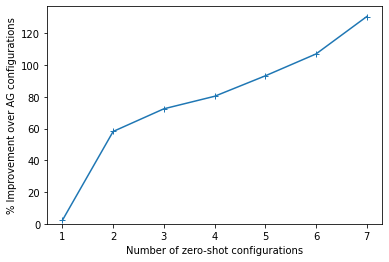

In [297]:
import matplotlib.pyplot as plt
improvements = []
for i in range(1, len(zs_configs)+1):
    avg_rank_zs = config_scorer_train.score(zs_configs[:i])
    improvement = (avg_rank_ag / avg_rank_zs - 1) * 100
    improvements.append(improvement)
plt.plot(range(1, len(zs_configs)+1), improvements, marker="+")
plt.xlabel("Number of zero-shot configurations")
plt.ylabel("% Improvement over AG configurations")
plt.ylim([0, None]);

In [298]:
# form (n_configuration, n_dataset) matrix
df_pivot_time_train_s = df_results_by_dataset_with_score_val.pivot_table(index='framework', columns='dataset', values=['time_train_s'])
avg_time_ag = df_pivot_time_train_s.loc[autogluon_configs]['time_train_s'].sum().mean()
avg_time_zeroshot = df_pivot_time_train_s.loc[zeroshot_configs]['time_train_s'].sum().mean()
print(f"average time autogluon/zeroshot configs: {avg_time_ag}/{avg_time_zeroshot}")

average time autogluon/zeroshot configs: 55.25284736362968/417.8023576924181


## Next steps (From David):
* obtain epoch or round metrics to evaluate ASHA
* reproduce analysis on other frameworks once data is available
* validate evaluation protocol to benchmark HPO:
    * what would be a reasonable number of configuration to be evaluated in total? (realistic for AG)
    * how many workers?
* clarify next steps in term of evaluations, I propose the following one
    * evaluate gain in AG if replace the current 4 config by zero-shot configurations
    * evaluate zero-shot + ASHA gain and wallclock time
    * if results are good, evaluate it in combination with AG HPO.

### Questions for Nick
* What is bestdiff?
  * N: The % lower relative error the best model in a given dataset has than this model.
    * A bestdiff of `0.2` for model A means that the oracle best model on each dataset has on average 20% lower relative error than model A.
        * Example: A has 90% accuracy, oracle best is expected to have 92% accuracy if bestdiff is `0.2`.
    * This is probably a better metric to optimize than loss rescaled, however it isn't perfect. It fails to appreciate quality differences when models are very weak, such as the difference between 50% accuracy and 52% accuracy. Mean-while it cares a lot about the difference between 99.99% and 99.999% accuracy.
* How is the loss rescaled?
  * N: best model = 0, worst model = 1, normalize rest between 0 and 1, separately for each dataset

You can refer to this code:

```
results_agg[BESTDIFF] = 1 - (results_agg['BEST_ERROR'] / results_agg[METRIC_ERROR])
results_agg[LOSS_RESCALED] = (results_agg[METRIC_ERROR] - results_agg['BEST_ERROR']) / (results_agg['WORST_ERROR'] - results_agg['BEST_ERROR'])
```


# Create new config based on ZS for AG

In [299]:
zeroshot_final = zeroshot_configs
zeroshot_final

['RandomForest_r29',
 'RandomForest_r47',
 'RandomForest_r36',
 'RandomForest_r12',
 'RandomForest_r5',
 'RandomForest_r40',
 'RandomForest_r42']

In [300]:
zeroshot_configs_dict = {config: configs_full[config] for config in zeroshot_final}
zeroshot_configs_dict

{'RandomForest_r29': {'hyperparameters': {'min_samples_leaf': 1,
   'max_leaf_nodes': 50000,
   'max_features': 0.5,
   'ag_args': {'name_suffix': '_r29'}},
  'name_prefix': 'RandomForest',
  'name_suffix': '_r29',
  'model_type': 'RF'},
 'RandomForest_r47': {'hyperparameters': {'min_samples_leaf': 10,
   'max_leaf_nodes': 50000,
   'max_features': 0.5,
   'ag_args': {'name_suffix': '_r47'}},
  'name_prefix': 'RandomForest',
  'name_suffix': '_r47',
  'model_type': 'RF'},
 'RandomForest_r36': {'hyperparameters': {'min_samples_leaf': 5,
   'max_leaf_nodes': 50000,
   'max_features': 'sqrt',
   'ag_args': {'name_suffix': '_r36'}},
  'name_prefix': 'RandomForest',
  'name_suffix': '_r36',
  'model_type': 'RF'},
 'RandomForest_r12': {'hyperparameters': {'min_samples_leaf': 40,
   'max_leaf_nodes': 15000,
   'max_features': 0.5,
   'ag_args': {'name_suffix': '_r12'}},
  'name_prefix': 'RandomForest',
  'name_suffix': '_r12',
  'model_type': 'RF'},
 'RandomForest_r5': {'hyperparameters': {'m

In [28]:
from autogluon.common.savers import save_json
save_json.save(path='configs_zs_20221005.json', obj=zeroshot_configs_dict)

In [301]:
zeroshot_model_results = df_results[df_results['framework'].isin(zeroshot_final)]
zeroshot_model_results = zeroshot_model_results.set_index('framework', drop=True)
zeroshot_model_results = zeroshot_model_results.reindex(zeroshot_final)
zeroshot_model_results

,time_train_s,metric_error,time_infer_s,bestdiff,loss_rescaled,time_train_s_rescaled,time_infer_s_rescaled,rank,rank=1_count,rank=2_count,rank=3_count,rank>3_count,error_count
framework,,,,,,,,,,,,,
RandomForest_r29,102.050003,74852.436131,0.000557,0.078912,0.240810,14.059766,3.302371,18.409729,14,204,92,687,0
RandomForest_r47,83.528009,72926.331162,0.000517,0.153762,0.196750,9.898961,1.846380,21.061184,5,32,23,937,10
RandomForest_r36,23.988252,72097.407515,0.000530,0.159859,0.208361,1.783910,2.553128,22.227182,0,9,16,972,1
RandomForest_r12,69.317329,75471.852432,0.000505,0.260026,0.442881,7.228265,1.245756,34.386660,0,11,6,980,0
RandomForest_r5,92.042207,72737.495053,0.000524,0.113319,0.159428,11.347895,2.344069,17.286861,35,13,27,922,0
RandomForest_r40,82.104611,72910.378871,0.000514,0.106909,0.168060,11.456245,1.302864,16.443831,9,32,33,923,10
RandomForest_r42,24.233999,71580.320637,0.000546,0.116367,0.187005,1.912704,3.051811,17.177031,2,26,16,953,10


## Extra: Save zeroshot config simulated results for comparison

In [302]:
zeroshot_sim_name = 'ALL_zs_rf_v4_CV2'

In [304]:
df_results_by_dataset_with_score_val_test = combine_results_with_score_val(df_raw_test, df_results_by_dataset)
config_scorer_test = SingleBestConfigScorer(df_results_by_dataset_with_score_val=df_results_by_dataset_with_score_val_test)
df_raw_zeroshot = get_zeroshot_config_simulation(config_scorer=config_scorer_test, df_raw=df_raw, zeroshot_sim_name=zeroshot_sim_name)

In [305]:
df_raw_zeroshot

,app_version,can_infer,constraint,dataset,fit_order,fit_time,fit_time_marginal,fold,framework,framework_parent,...,problem_type,score_val,seed,stack_level,tid,time_infer_s,utc,version,tid_new,time_train_s
0,dev [https://github.com/Innixma/automlbenchmar...,True,16h8c,abalone,6,0.471724,0.471724,5,ALL_zs_rf_v4_CV2,,...,regression,-2.213539,625497619,1,359944.0,0.104514,2022-10-06T00:24:41,0.5.3b20221006,359944_5,3.184194
1,dev [https://github.com/Innixma/automlbenchmar...,True,16h8c,Brazilian_houses,6,0.768302,0.768302,4,ALL_zs_rf_v4_CV2,,...,regression,-421.051621,625497618,1,359938.0,0.120288,2022-10-05T23:54:01,0.5.3b20221005,359938_4,5.088086
2,dev [https://github.com/Innixma/automlbenchmar...,True,16h8c,Brazilian_houses,6,0.769486,0.769486,5,ALL_zs_rf_v4_CV2,,...,regression,-553.953842,625497619,1,359938.0,0.121924,2022-10-05T23:54:28,0.5.3b20221005,359938_5,5.088672
3,dev [https://github.com/Innixma/automlbenchmar...,True,16h8c,Brazilian_houses,6,0.767472,0.767472,6,ALL_zs_rf_v4_CV2,,...,regression,-855.419756,625497620,1,359938.0,0.103419,2022-10-05T23:54:30,0.5.3b20221005,359938_6,5.075980
4,dev [https://github.com/Innixma/automlbenchmar...,True,16h8c,Brazilian_houses,6,0.768530,0.768530,8,ALL_zs_rf_v4_CV2,,...,regression,-450.230075,625497622,1,359938.0,0.104350,2022-10-05T23:55:02,0.5.3b20221005,359938_8,5.084680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,dev [https://github.com/Innixma/automlbenchmar...,True,16h8c,porto-seguro,13,207.861441,207.861441,2,ALL_zs_rf_v4_CV2,,...,binary,0.614830,625497616,1,360113.0,0.798502,2022-10-06T03:09:08,0.5.3b20221006,360113_2,1306.058823
485,dev [https://github.com/Innixma/automlbenchmar...,True,16h8c,porto-seguro,13,202.933389,202.933389,3,ALL_zs_rf_v4_CV2,,...,binary,0.611169,625497617,1,360113.0,1.279362,2022-10-06T03:08:58,0.5.3b20221006,360113_3,1283.276256
486,dev [https://github.com/Innixma/automlbenchmar...,True,16h8c,porto-seguro,13,228.121509,228.121509,4,ALL_zs_rf_v4_CV2,,...,binary,0.608932,625497618,1,360113.0,1.444711,2022-10-06T03:09:42,0.5.3b20221006,360113_4,1298.726196
487,dev [https://github.com/Innixma/automlbenchmar...,True,16h8c,porto-seguro,13,201.432253,201.432253,5,ALL_zs_rf_v4_CV2,,...,binary,0.622495,625497619,1,360113.0,1.447262,2022-10-06T03:08:10,0.5.3b20221006,360113_5,1269.261610


In [235]:
from autogluon.common.savers import save_pd
# Use this file to compare theoretical performance to AutoGluon in separate analysis repo
save_pd.save(path='zeroshot_all_rf_v4_9fold_7.csv', df=df_raw_zeroshot)